**Artificial Neural Network**

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
X = dataset.iloc[:  , 3:13].values
y = dataset.iloc[: , -1].values

**Encoding the Categorical Data**

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[: , 2] = labelencoder.fit_transform(X[: , 2])

In [7]:
X[0]

array([619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers = [('encoder' , OneHotEncoder() , [1])] , remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [11]:
X = X[: , 1:] #avoid dummy variable trap

In [39]:
X[4]

array([0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1], dtype=object)

**Splitting the data in to training set and test set**

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
sc=  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


**Building the artificial Neural Network**


In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout

In [19]:
classifier = Sequential()

In [20]:
classifier.add(Dense(units = 15 , activation='relu' , kernel_initializer='glorot_uniform' , input_dim=11))

In [22]:
classifier.add(Dropout(rate=0.1))

In [23]:
classifier.add(Dense(units = 12 , activation='relu' , kernel_initializer='glorot_uniform'))
classifier.add(Dropout(rate=0.1))

In [24]:
classifier.add(Dense(units = 1 , activation='sigmoid'))

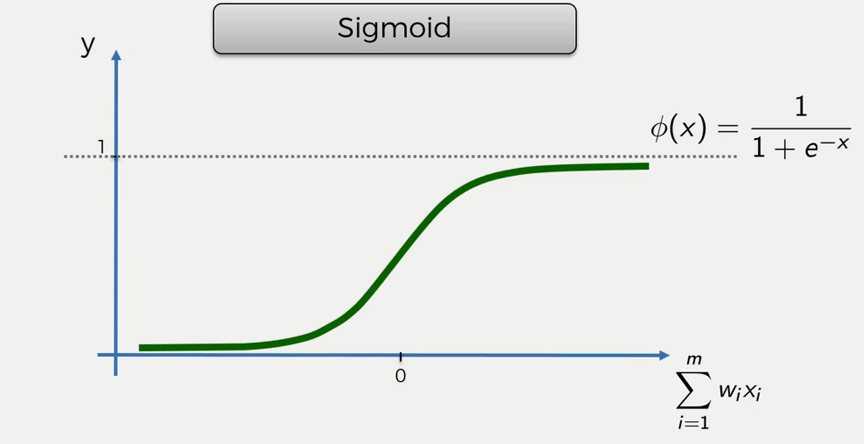

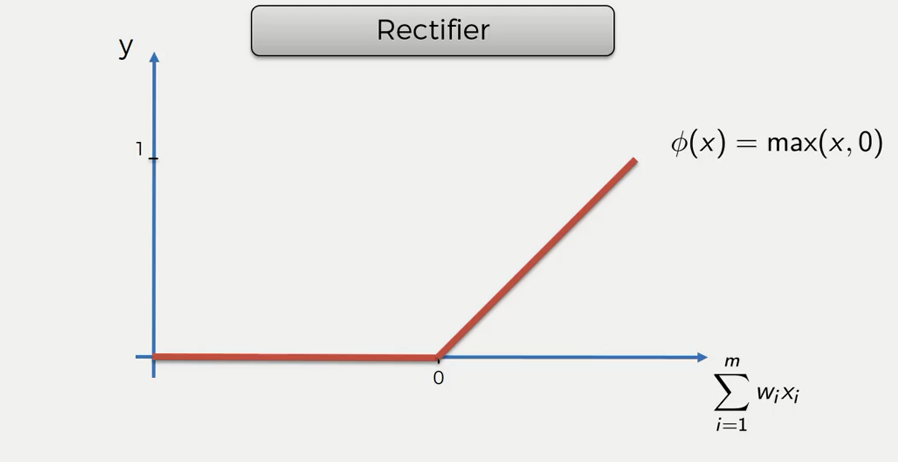

In [25]:
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [27]:
classifier.fit(x_train, y_train, batch_size=32 , epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8529
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8544
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8558
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3510 - accuracy: 0.8562
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.8566
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8556
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8596
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8553
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8571
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3501 - accura

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
y_pred

array([[0.21833669],
       [0.33892953],
       [0.11291581],
       ...,
       [0.14610885],
       [0.15314092],
       [0.22076151]], dtype=float32)

In [33]:
y_pred = y_pred >=0.5

In [34]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

**Making the confusion matix**

0.861


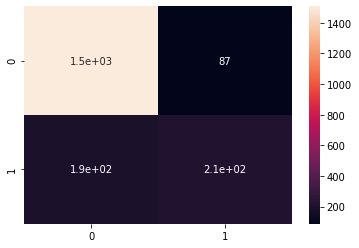

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm  , annot=True)
print(accuracy_score(y_test , y_pred))

# Predicting a single new observation


Predict if the customer with the given information below will leave the bank or not:


1. Geography: Spain
2.Credit Score: 700
3.Gender: Female
4.Age: 35
5.Tenure: 4
6.Balance: 50000
7.Number of Products: 3
8.Has Credit Card: Yes
9.Is Active Member: Yes
10.Estimated Salary: 40000



In [40]:
y_new = classifier.predict(sc.transform(np.array([[0.0 , 1.0 , 700 , 0 ,35 , 4 ,50000 , 3 , 1 ,1 ,40000]])))

In [41]:
y_new

array([[0.72890335]], dtype=float32)

In [43]:
y_new = y_new>0.5
print(y_new)

[[ True]]


**Thank You!!!**